In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly

In [2]:
pd.set_option("display.max_rows", None)

In [3]:
df_base = pd.read_excel('../Data/EIS_nyquist/base.xlsx') 
df_ht = pd.read_excel('../Data/EIS_nyquist/ht.xlsx') 
df_sp = pd.read_excel('../Data/EIS_nyquist/sp.xlsx') 
df_htsp = pd.read_excel('../Data/EIS_nyquist/htsp.xlsx') 

In [4]:
df_base = df_base.iloc[1:]

In [5]:
df_ht = df_ht.iloc[1:]

In [6]:
df_htsp = df_htsp.iloc[1:]

In [7]:
df_sp = df_sp.iloc[1:]

In [12]:
df_base = df_base.rename(columns={"ab": "Img"})
df_sp = df_sp.rename(columns={"sp": "Img"})
df_htsp = df_htsp.rename(columns={"htsp": "Img"})
df_ht = df_ht.rename(columns={"ht": "Img"})

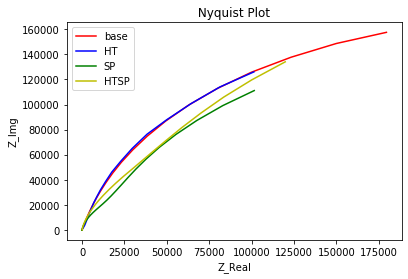

In [13]:
plt.plot(df_base["XY"].values,df_base["Img"].values,'r',label = 'base')
plt.plot(df_ht["XY"].values,df_ht["Img"].values,'b',label = 'HT')
plt.plot(df_sp["XY"].values,df_sp["Img"].values,'g',label = 'SP')
plt.plot(df_htsp["XY"].values,df_htsp["Img"].values,'y',label = 'HTSP')
plt.legend()
plt.title(' Nyquist Plot ')
plt.xlabel('Z_Real')
plt.ylabel('Z_Img')
plt.show()

## Adding the postprocessing feature columns in the datatset

In [14]:
df_base["T"] = 0*np.ones((df_base.shape[0],1))
df_base["t"] = 0*np.ones((df_base.shape[0],1))
df_base["incl"] = 0*np.ones((df_base.shape[0],1))
df_base["vel"] = 0*np.ones((df_base.shape[0],1))

In [15]:
df_ht["T"] = 980*np.ones((df_ht.shape[0],1))
df_ht["t"] = 15*np.ones((df_ht.shape[0],1))
df_ht["incl"] = 0*np.ones((df_ht.shape[0],1))
df_ht["vel"] = 0*np.ones((df_ht.shape[0],1))

In [16]:
df_sp["T"] = 0*np.ones((df_sp.shape[0],1))
df_sp["t"] = 0*np.ones((df_sp.shape[0],1))
df_sp["incl"] = 60*np.ones((df_sp.shape[0],1))
df_sp["vel"] = 70*np.ones((df_sp.shape[0],1))

In [17]:
df_htsp["T"] = 980*np.ones((df_htsp.shape[0],1))
df_htsp["t"] = 15*np.ones((df_htsp.shape[0],1))
df_htsp["incl"] = 60*np.ones((df_htsp.shape[0],1))
df_htsp["vel"] = 70*np.ones((df_htsp.shape[0],1))

In [18]:
result_df = pd.concat([df_base,df_ht,df_sp,df_htsp])

In [19]:
result_df.shape

(284, 6)

In [20]:
print_df = result_df
print_df = print_df.rename(columns={'XY':'Z_real','Img':'Z_img'})

In [21]:
print_df.head()

,Z_real,Z_img,T,t,incl,vel
1,27.59,0.7454,0.0,0.0,0.0,0.0
2,27.65,0.8027,0.0,0.0,0.0,0.0
3,27.58,0.8257,0.0,0.0,0.0,0.0
4,27.66,0.8962,0.0,0.0,0.0,0.0
5,27.74,1.05,0.0,0.0,0.0,0.0


In [22]:
x, y = result_df.drop(['Img'], axis=1), result_df['Img'].values.astype('float64')

## Fitting a Xgboost model

In [23]:
import xgboost as xgb

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score, r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)
xgb_model = xgb.XGBRegressor(random_state = 0)
xgb_model.fit(x_train,y_train)
#R2
#MAE
#RMSE
print(r2_score(y_test,xgb_model.predict(x_test)))
print(mean_absolute_error(y_test,xgb_model.predict(x_test)))
print(sqrt(mean_squared_error(y_test,xgb_model.predict(x_test))))

[17:59:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.9970507305020451
771.886579054309
1776.5695553980825


In [25]:
xgb_model.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

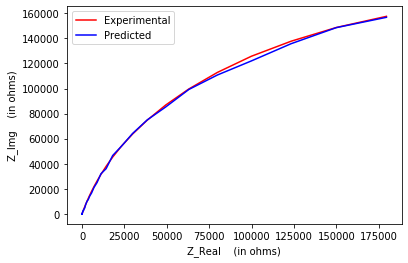

In [26]:
plt.plot(df_base["XY"].values,df_base["Img"].values,'r',label = 'Experimental')
plt.plot(df_base["XY"].values,xgb_model.predict(df_base.drop(['Img'],axis=1)),'b',label='Predicted')
plt.legend()
#plt.title('Base')
plt.xlabel('Z_Real    (in ohms)')
plt.ylabel('Z_Img    (in ohms)')
plt.savefig('./Plots/Nyquist/nyquist_xgb_ab.png',dpi = 1200,bbox_inches='tight')
plt.show()

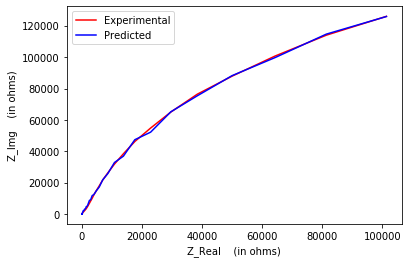

In [27]:
plt.plot(df_ht["XY"].values,df_ht["Img"].values,'r',label = 'Experimental')
plt.plot(df_ht["XY"].values,xgb_model.predict(df_ht.drop(['Img'],axis=1)),'b',label='Predicted')
plt.legend()
#plt.title('ht')
plt.xlabel('Z_Real    (in ohms)')
plt.ylabel('Z_Img    (in ohms)')
plt.savefig('./Plots/Nyquist/nyquist_xgb_ht.png',dpi = 1200,bbox_inches='tight')
plt.show()
plt.show()

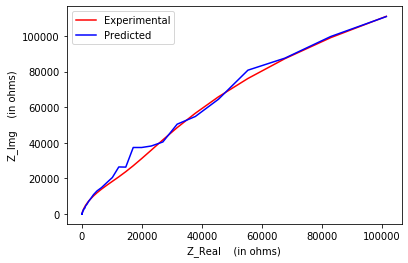

In [28]:
plt.plot(df_sp["XY"].values,df_sp["Img"].values,'r',label = 'Experimental')
plt.plot(df_sp["XY"].values,xgb_model.predict(df_sp.drop(['Img'],axis=1)),'b',label='Predicted')
plt.legend()
#plt.title('sp')
plt.xlabel('Z_Real    (in ohms)')
plt.ylabel('Z_Img    (in ohms)')
plt.savefig('./Plots/Nyquist/nyquist_xgb_sp.png',dpi = 1200,bbox_inches='tight')
plt.show()
plt.show()

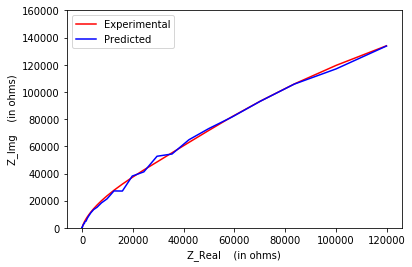

In [29]:
plt.plot(df_htsp["XY"].values,df_htsp["Img"].values,'r',label = 'Experimental')
plt.plot(df_htsp["XY"].values,xgb_model.predict(df_htsp.drop(['Img'],axis=1)),'b',label='Predicted')
plt.legend()
#plt.title('HTSP')
plt.ylim(0,160000)
plt.xlabel('Z_Real    (in ohms)')
plt.ylabel('Z_Img    (in ohms)')
plt.savefig('nyquist_xgb_htsp.png',dpi = 1200,bbox_inches='tight')
plt.show()
plt.show()

## Fitting a Support Vector Regression

In [30]:
from sklearn import svm
svr_model = svm.SVR(kernel='linear', epsilon = 0.1)
svr_model.fit(x_train,y_train)
#R2
#MAE
#RMSE
print(r2_score(y_test,svr_model.predict(x_test)))
print(mean_absolute_error(y_test,svr_model.predict(x_test)))
print(sqrt(mean_squared_error(y_test,svr_model.predict(x_test))))

0.9618846081313174
3073.181205792892
6386.680348559535


In [31]:
svr_model.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

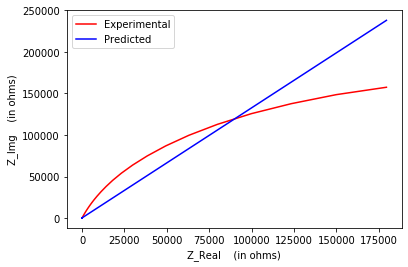

In [32]:
plt.plot(df_base["XY"].values,df_base["Img"].values,'r',label = 'Experimental')
plt.plot(df_base["XY"].values,svr_model.predict(df_base.drop(['Img'],axis=1)),'b',label='Predicted')
plt.legend()
plt.xlabel('Z_Real    (in ohms)')
plt.ylabel('Z_Img    (in ohms)')
plt.savefig('./Plots/Nyquist/nyquist_svm_ab.png',dpi = 1200,bbox_inches='tight')
plt.show()
#plt.title('base')
plt.show()

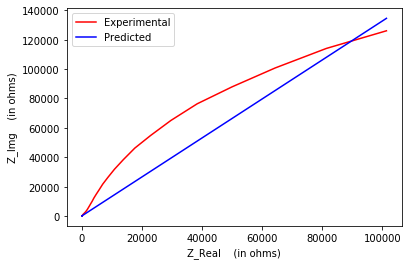

In [33]:
plt.plot(df_ht["XY"].values,df_ht["Img"].values,'r',label = 'Experimental')
plt.plot(df_ht["XY"].values,svr_model.predict(df_ht.drop(['Img'],axis=1)),'b',label='Predicted')
plt.legend()
#plt.title('HT')
plt.xlabel('Z_Real    (in ohms)')
plt.ylabel('Z_Img    (in ohms)')
plt.savefig('./Plots/Nyquist/nyquist_svm_ht.png',dpi = 1200,bbox_inches='tight')
plt.show()

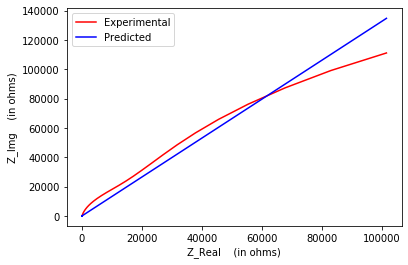

In [34]:
plt.plot(df_sp["XY"].values,df_sp["Img"].values,'r',label = 'Experimental')
plt.plot(df_sp["XY"].values,svr_model.predict(df_sp.drop(['Img'],axis=1)),'b',label='Predicted')
plt.legend()
#plt.title('SP')
plt.xlabel('Z_Real    (in ohms)')
plt.ylabel('Z_Img    (in ohms)')
plt.savefig('./Plots/Nyquist/nyquist_svm_sp.png',dpi = 1200,bbox_inches='tight')
plt.show()

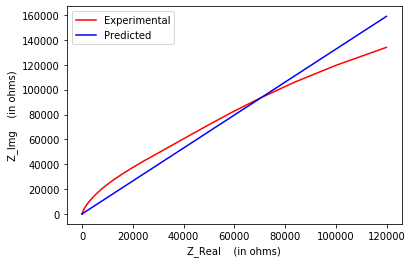

In [35]:
plt.plot(df_htsp["XY"].values,df_htsp["Img"].values,'r',label = 'Experimental')
plt.plot(df_htsp["XY"].values,svr_model.predict(df_htsp.drop(['Img'],axis=1)),'b',label='Predicted')
plt.legend()
#plt.title('HTSP')
plt.xlabel('Z_Real    (in ohms)')
plt.ylabel('Z_Img    (in ohms)')
plt.savefig('./Plots/Nyquist/nyquist_svm_htsp.png',dpi = 1200,bbox_inches='tight')
plt.show()

## Fitting a Decision Tree

In [36]:
from sklearn import tree
dt_model = tree.DecisionTreeRegressor(max_depth = 6)
dt_model.fit(x_train,y_train)
#R2
#MAE
#RMSE
print(r2_score(y_test,dt_model.predict(x_test)))
print(mean_absolute_error(y_test,dt_model.predict(x_test)))
print(sqrt(mean_squared_error(y_test,dt_model.predict(x_test))))

0.9888585036068012
1446.586632198129
3453.0013474604975


In [37]:
dt_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 6,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

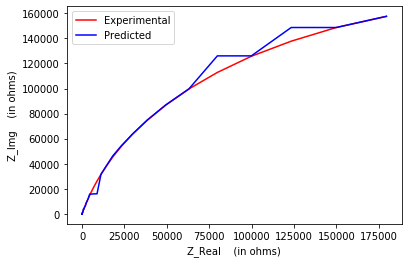

In [38]:
plt.plot(df_base["XY"].values,df_base["Img"].values,'r',label = 'Experimental')
plt.plot(df_base["XY"].values,dt_model.predict(df_base.drop(['Img'],axis=1)),'b',label='Predicted')
plt.legend()
#plt.title('base')
plt.xlabel('Z_Real    (in ohms)')
plt.ylabel('Z_Img    (in ohms)')
plt.savefig('./Plots/Nyquist/nyquist_dt_ab.png',dpi = 1200,bbox_inches='tight')
plt.show()

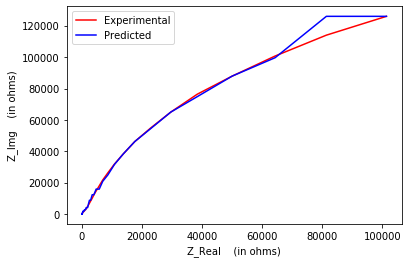

In [39]:
plt.plot(df_ht["XY"].values,df_ht["Img"].values,'r',label = 'Experimental')
plt.plot(df_ht["XY"].values,dt_model.predict(df_ht.drop(['Img'],axis=1)),'b',label='Predicted')
plt.legend()
#plt.title('HT')
plt.xlabel('Z_Real    (in ohms)')
plt.ylabel('Z_Img    (in ohms)')
plt.savefig('./Plots/Nyquist/nyquist_dt_ht.png',dpi = 1200,bbox_inches='tight')
plt.show()

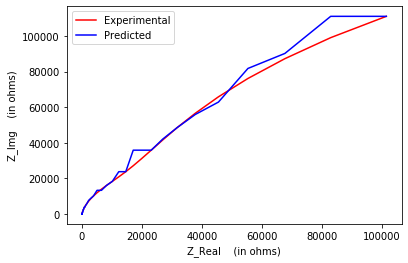

In [40]:
plt.plot(df_sp["XY"].values,df_sp["Img"].values,'r',label = 'Experimental')
plt.plot(df_sp["XY"].values,dt_model.predict(df_sp.drop(['Img'],axis=1)),'b',label='Predicted')
plt.legend()
#plt.title('SP')
plt.xlabel('Z_Real    (in ohms)')
plt.ylabel('Z_Img    (in ohms)')
plt.savefig('./Plots/Nyquist/nyquist_dt_sp.png',dpi = 1200,bbox_inches='tight')
plt.show()

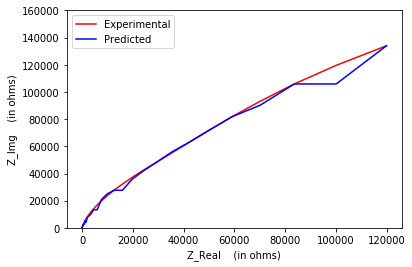

In [41]:
plt.plot(df_htsp["XY"].values,df_htsp["Img"].values,'r',label = 'Experimental')
plt.plot(df_htsp["XY"].values,dt_model.predict(df_htsp.drop(['Img'],axis=1)),'b',label='Predicted')
plt.legend()
#plt.title('HTSP')
plt.xlabel('Z_Real    (in ohms)')
plt.ylabel('Z_Img    (in ohms)')
plt.ylim(0,160000)
plt.savefig('nyquist_dt_htsp.png',dpi = 1200,bbox_inches='tight')
plt.show()

## Fitting a Polynomial Regression

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

linear_model = LinearRegression()
degree=2
poly_model =make_pipeline(PolynomialFeatures(degree),LinearRegression())

poly_model.fit(x_train,y_train)
#R2
#MAE
#RMSE
print(r2_score(y_test,poly_model.predict(x_test)))
print(mean_absolute_error(y_test,poly_model.predict(x_test)))
print(sqrt(mean_squared_error(y_test,poly_model.predict(x_test))))

0.9886311888104038
2217.0878874636114
3488.048481957032


In [43]:
poly_model.get_params()

{'memory': None,
 'steps': [('polynomialfeatures',
   PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                      order='C')),
  ('linearregression',
   LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False))],
 'verbose': False,
 'polynomialfeatures': PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                    order='C'),
 'linearregression': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
 'polynomialfeatures__degree': 2,
 'polynomialfeatures__include_bias': True,
 'polynomialfeatures__interaction_only': False,
 'polynomialfeatures__order': 'C',
 'linearregression__copy_X': True,
 'linearregression__fit_intercept': True,
 'linearregression__n_jobs': None,
 'linearregression__normalize': False}

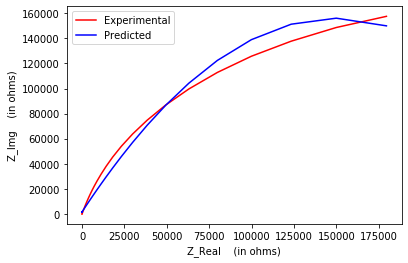

In [44]:
plt.plot(df_base["XY"].values,df_base["Img"].values,'r',label = 'Experimental')
plt.plot(df_base["XY"].values,poly_model.predict(df_base.drop(['Img'],axis=1)),'b',label='Predicted')
plt.legend()
#plt.title('HT')
plt.xlabel('Z_Real    (in ohms)')
plt.ylabel('Z_Img    (in ohms)')
plt.savefig('./Plots/Nyquist/nyquist_poly_ab.png',dpi = 1200,bbox_inches='tight')
plt.show()

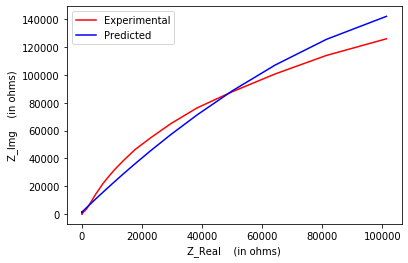

In [45]:
plt.plot(df_ht["XY"].values,df_ht["Img"].values,'r',label = 'Experimental')
plt.plot(df_ht["XY"].values,poly_model.predict(df_ht.drop(['Img'],axis=1)),'b',label='Predicted')
plt.legend()
#plt.title('HT')
plt.xlabel('Z_Real    (in ohms)')
plt.ylabel('Z_Img    (in ohms)')
plt.savefig('./Plots/Nyquist/nyquist_poly_ht.png',dpi = 1200,bbox_inches='tight')
plt.show()

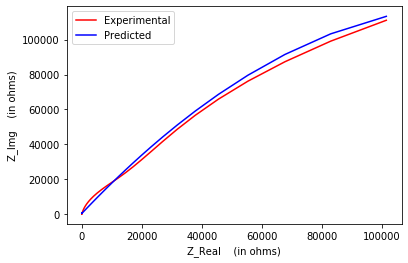

In [46]:
plt.plot(df_sp["XY"].values,df_sp["Img"].values,'r',label = 'Experimental')
plt.plot(df_sp["XY"].values,poly_model.predict(df_sp.drop(['Img'],axis=1)),'b',label='Predicted')
plt.legend()
#plt.title('HT')
plt.xlabel('Z_Real    (in ohms)')
plt.ylabel('Z_Img    (in ohms)')
plt.savefig('./Plots/Nyquist/nyquist_poly_sp.png',dpi = 1200,bbox_inches='tight')
plt.show()

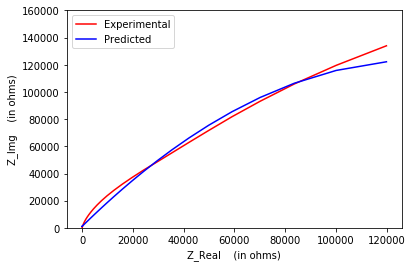

In [47]:
plt.plot(df_htsp["XY"].values,df_htsp["Img"].values,'r',label = 'Experimental')
plt.plot(df_htsp["XY"].values,poly_model.predict(df_htsp.drop(['Img'],axis=1)),'b',label='Predicted')
plt.legend()
#plt.title('HT')
plt.xlabel('Z_Real    (in ohms)')
plt.ylim(0,160000)
plt.ylabel('Z_Img    (in ohms)')
plt.savefig('nyquist_poly_htsp.png',dpi = 1200,bbox_inches='tight')
plt.show()

## XGBoost Feature Importance


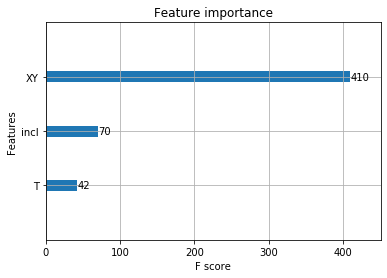

In [48]:
from xgboost import plot_importance
#reduction in mse
plot_importance(xgb_model)
plt.show()

Among the models considered, XGBoost performs the best. So we will do hyperparameter optimisation for XgBoost using Optuna
# Optuna For Hyperparameter Optimisation

In [20]:
import optuna

In [21]:
def xgb_objective(trial):
    train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.15)
    param = {
        'silent': 1,
        'random_state': 0,
        'objective': 'reg:linear',
        'booster': trial.suggest_categorical('booster', ['gbtree', 'gblinear', 'dart']),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-4, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4, 1.0),
        'n_estimators': trial.suggest_int('n_estimators',10,100),
        'learning_rate': trial.suggest_loguniform('learning_rste', 1e-4, 0.1),
        'max_depth':trial.suggest_int('max_depth',3,6)
    }
    bst = xgb.XGBRegressor(**param)
    bst.fit(train_x,train_y)
    return sqrt(mean_squared_error(test_y,bst.predict(test_x)))

In [22]:
SEED = 42

np.random.seed(SEED)

xgb_study = optuna.create_study(direction='minimize',sampler=optuna.samplers.TPESampler(seed=SEED),pruner=optuna.pruners.SuccessiveHalvingPruner())
xgb_study.optimize(xgb_objective, n_trials=100)

[I 2021-04-02 10:34:49,101] A new study created in memory with name: no-name-1bcb3bad-ab0d-458e-85de-2d04caa81b56
[I 2021-04-02 10:34:49,158] Trial 0 finished with value: 22771.97084083892 and parameters: {'booster': 'dart', 'reg_lambda': 0.15352246941973485, 'reg_alpha': 0.000541675458324746, 'n_estimators': 81, 'learning_rste': 0.006251373574521752, 'max_depth': 5}. Best is trial 0 with value: 22771.97084083892.
[I 2021-04-02 10:34:49,174] Trial 1 finished with value: 30833.518643120467 and parameters: {'booster': 'gblinear', 'reg_lambda': 0.0004207053950287938, 'reg_alpha': 0.0001707396743152812, 'n_estimators': 97, 'learning_rste': 0.0010025956902289571, 'max_depth': 6}. Best is trial 0 with value: 22771.97084083892.
[I 2021-04-02 10:34:49,212] Trial 2 finished with value: 33871.781214783216 and parameters: {'booster': 'dart', 'reg_lambda': 0.00012087541473056971, 'reg_alpha': 0.7579479953348001, 'n_estimators': 39, 'learning_rste': 0.0004335281794951569, 'max_depth': 6}. Best is t

[I 2021-04-02 10:34:50,142] Trial 26 finished with value: 20143.69926869133 and parameters: {'booster': 'gblinear', 'reg_lambda': 0.016136238553119336, 'reg_alpha': 0.037696925707340144, 'n_estimators': 56, 'learning_rste': 0.005082896815872178, 'max_depth': 4}. Best is trial 23 with value: 7839.61716380006.
[I 2021-04-02 10:34:50,195] Trial 27 finished with value: 13701.707764300243 and parameters: {'booster': 'gbtree', 'reg_lambda': 0.5233420126242173, 'reg_alpha': 0.09466570442864136, 'n_estimators': 44, 'learning_rste': 0.014413654264191719, 'max_depth': 4}. Best is trial 23 with value: 7839.61716380006.
[I 2021-04-02 10:34:50,245] Trial 28 finished with value: 10698.442687813338 and parameters: {'booster': 'gblinear', 'reg_lambda': 0.20488947711208644, 'reg_alpha': 0.010170228665392089, 'n_estimators': 65, 'learning_rste': 0.026962800870985643, 'max_depth': 3}. Best is trial 23 with value: 7839.61716380006.
[I 2021-04-02 10:34:50,299] Trial 29 finished with value: 22488.6993744941

[I 2021-04-02 10:34:51,312] Trial 52 finished with value: 12887.741069900403 and parameters: {'booster': 'dart', 'reg_lambda': 0.005757319537305547, 'reg_alpha': 0.00019798826328514639, 'n_estimators': 31, 'learning_rste': 0.035118869987818095, 'max_depth': 3}. Best is trial 42 with value: 2056.938548810464.
[I 2021-04-02 10:34:51,358] Trial 53 finished with value: 2950.076981706366 and parameters: {'booster': 'dart', 'reg_lambda': 0.02888029220567964, 'reg_alpha': 0.0008434752643265202, 'n_estimators': 37, 'learning_rste': 0.09717797535811865, 'max_depth': 3}. Best is trial 42 with value: 2056.938548810464.
[I 2021-04-02 10:34:51,396] Trial 54 finished with value: 3226.289884308396 and parameters: {'booster': 'dart', 'reg_lambda': 0.03055476706493083, 'reg_alpha': 0.000838541858569887, 'n_estimators': 24, 'learning_rste': 0.0988393200951382, 'max_depth': 3}. Best is trial 42 with value: 2056.938548810464.
[I 2021-04-02 10:34:51,428] Trial 55 finished with value: 8078.301835902826 and 

[I 2021-04-02 10:34:52,487] Trial 78 finished with value: 2409.0288006040714 and parameters: {'booster': 'dart', 'reg_lambda': 0.0023186532966078246, 'reg_alpha': 0.00017652340627160112, 'n_estimators': 84, 'learning_rste': 0.04440918961886903, 'max_depth': 3}. Best is trial 69 with value: 1308.131266167641.
[I 2021-04-02 10:34:52,554] Trial 79 finished with value: 8272.207996560846 and parameters: {'booster': 'dart', 'reg_lambda': 0.000818779211864177, 'reg_alpha': 0.00042730391482558093, 'n_estimators': 77, 'learning_rste': 0.014567198396408835, 'max_depth': 3}. Best is trial 69 with value: 1308.131266167641.
[I 2021-04-02 10:34:52,603] Trial 80 finished with value: 5717.26574674113 and parameters: {'booster': 'dart', 'reg_lambda': 0.0019371922684625182, 'reg_alpha': 0.00015644359588503476, 'n_estimators': 53, 'learning_rste': 0.03745914412809431, 'max_depth': 3}. Best is trial 69 with value: 1308.131266167641.
[I 2021-04-02 10:34:52,656] Trial 81 finished with value: 2433.6549309400

In [24]:
from typing import Callable
from typing import Optional

import numpy as np

from optuna._experimental import experimental
from optuna.logging import get_logger
from optuna.study import Study
from optuna.study import StudyDirection
from optuna.trial import FrozenTrial
from optuna.trial import TrialState
from optuna.visualization._utils import _check_plot_args
from optuna.visualization.matplotlib._matplotlib_imports import _imports


if _imports.is_successful():
    from optuna.visualization.matplotlib._matplotlib_imports import Axes
    from optuna.visualization.matplotlib._matplotlib_imports import plt

_logger = get_logger(__name__)

In [27]:
def optimization_history(
    study: Study,
    *,
    target: Optional[Callable[[FrozenTrial], float]] = None,
    target_name: str = "Objective Value",
) -> "Axes":
    """Plot optimization history of all trials in a study with Matplotlib.
    .. seealso::
        Please refer to :func:`optuna.visualization.plot_optimization_history` for an example.
    Example:
        The following code snippet shows how to plot optimization history.
        .. plot::
            import optuna
            def objective(trial):
                x = trial.suggest_float("x", -100, 100)
                y = trial.suggest_categorical("y", [-1, 0, 1])
                return x ** 2 + y
            sampler = optuna.samplers.TPESampler(seed=10)
            study = optuna.create_study(sampler=sampler)
            study.optimize(objective, n_trials=10)
            optuna.visualization.matplotlib.plot_optimization_history(study)
    Args:
        study:
            A :class:`~optuna.study.Study` object whose trials are plotted for their target values.
        target:
            A function to specify the value to display. If it is :obj:`None` and ``study`` is being
            used for single-objective optimization, the objective values are plotted.
            .. note::
                Specify this argument if ``study`` is being used for multi-objective optimization.
        target_name:
            Target's name to display on the axis label and the legend.
    Returns:
        A :class:`matplotlib.axes.Axes` object.
    Raises:
        :exc:`ValueError`:
            If ``target`` is :obj:`None` and ``study`` is being used for multi-objective
            optimization.
    """

    _imports.check()
    _check_plot_args(study, target, target_name)
    get_optimization_history_plot(study, target, target_name)
    return 0


def get_optimization_history_plot(
    study: Study,
    target: Optional[Callable[[FrozenTrial], float]],
    target_name: str,
) -> "Axes":

    # Set up the graph style.
    fig = plt.figure()
    plt.title("Optimization History Plot")
    plt.xlabel("#Trials")
    plt.ylabel(target_name)
    
    # Prepare data for plotting.
    trials = [t for t in study.trials if t.state == TrialState.COMPLETE]

    if len(trials) == 0:
        _logger.warning("Study instance does not contain trials.")
        return 0

    # Draw a scatter plot and a line plot.
    if target is None:
        if study.direction == StudyDirection.MINIMIZE:
            best_values = np.minimum.accumulate([t.value for t in trials])
        else:
            best_values = np.maximum.accumulate([t.value for t in trials])
        plt.scatter(
            x=[t.number for t in trials],
            y=[t.value for t in trials],
            color='blue',
            alpha=1,
            label=target_name,
        )
        plt.plot(
            [t.number for t in trials],
            best_values,
            marker="o",
            color='red',
            alpha=0.5,
            label="Best Value",
        )

        plt.legend()
    else:
        plt.scatter(
            x=[t.number for t in trials],
            y=[target(t) for t in trials],
            color='red',
            alpha=1,
            label=target_name,
        )
    plt.savefig('nyquist_opt_his.png',dpi = 1200,bbox_inches='tight')
    plt.show()

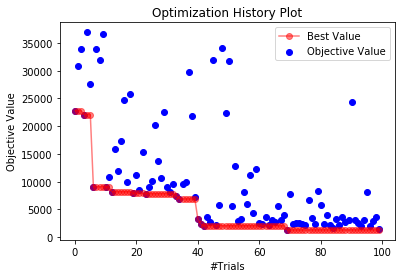

0

In [26]:
optimization_history(xgb_study)

In [27]:
xgb_study.trials_dataframe()

,number,value,datetime_start,datetime_complete,duration,params_booster,params_learning_rste,params_max_depth,params_n_estimators,params_reg_alpha,params_reg_lambda,state
0,0,22771.970841,2021-02-22 19:08:12.607427,2021-02-22 19:08:12.669154,00:00:00.061727,dart,0.006251,5,81,0.000542,0.153522,COMPLETE
1,1,30833.518643,2021-02-22 19:08:12.671625,2021-02-22 19:08:12.694738,00:00:00.023113,gblinear,0.001003,6,97,0.000171,0.000421,COMPLETE
2,2,33871.781215,2021-02-22 19:08:12.697513,2021-02-22 19:08:12.733614,00:00:00.036101,dart,0.000434,6,39,0.757948,0.000121,COMPLETE
3,3,22075.377628,2021-02-22 19:08:12.736631,2021-02-22 19:08:12.806743,00:00:00.070112,gbtree,0.000748,5,98,0.027965,0.029507,COMPLETE
4,4,36922.366295,2021-02-22 19:08:12.809461,2021-02-22 19:08:12.884371,00:00:00.074910,dart,0.000499,4,89,0.001474,0.000361,COMPLETE
5,5,27609.358441,2021-02-22 19:08:12.887308,2021-02-22 19:08:12.929220,00:00:00.041912,dart,0.002514,3,73,0.003387,0.029754,COMPLETE
6,6,9081.893071,2021-02-22 19:08:12.930669,2021-02-22 19:08:12.957920,00:00:00.027251,dart,0.070252,6,27,0.006339,0.052630,COMPLETE
7,7,33972.112866,2021-02-22 19:08:12.959417,2021-02-22 19:08:12.979209,00:00:00.019792,gblinear,0.000493,6,62,0.001654,0.171234,COMPLETE
8,8,31901.852495,2021-02-22 19:08:12.980798,2021-02-22 19:08:12.999835,00:00:00.019037,dart,0.000127,4,17,0.027541,0.054082,COMPLETE
9,9,36590.982035,2021-02-22 19:08:13.002128,2021-02-22 19:08:13.019431,00:00:00.017303,gbtree,0.001886,4,11,0.044678,0.001084,COMPLETE


In [25]:
xgb_study.best_params 

{'booster': 'dart',
 'reg_lambda': 0.0019584556138049092,
 'reg_alpha': 0.00013070126091775205,
 'n_estimators': 78,
 'learning_rste': 0.04804891156199112,
 'max_depth': 3}

In [26]:
bst_params = {'booster': 'dart',
 'reg_lambda': 0.0019584556138049092,
 'reg_alpha': 0.00013070126091775205,
 'n_estimators': 78,
 'learning_rste': 0.04804891156199112,
 'max_depth': 3}

In [27]:
final_model = xgb.XGBRegressor(**bst_params)
final_model.fit(x_train,y_train)

[16:14:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='dart', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1,
             learning_rste=0.04804891156199112, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=None, n_estimators=78, n_jobs=1,
             nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0.00013070126091775205, reg_lambda=0.0019584556138049092,
             scale_pos_weight=1, seed=None, silent=None, subsample=1,
             verbosity=1)

In [28]:
print(r2_score(y_test,final_model.predict(x_test)))
print(mean_absolute_error(y_test,final_model.predict(x_test)))
print(sqrt(mean_squared_error(y_test,final_model.predict(x_test))))

0.9972044434538729
800.6506720081737
1729.6535654030217


In [31]:
final_model.get_booster().get_score(importance_type='gain')

{'XY': 2312057038.647541, 'incl': 70992730.48688021, 'T': 7582118.916870968}

In [34]:
gain_unnorm = np.array([2312057038.647541,70992730.48688021, 7582118.916870968])

In [36]:
gain = gain_unnorm/np.sum(gain_unnorm)

In [37]:
gain

array([0.96713218, 0.02969622, 0.0031716 ])

In [38]:
columns = ['Z(Real)' ,'inclination','T']

In [43]:
def _label_barh(bars, text_format, **kwargs):
    """
    Attach a text label to each bar displaying its y value
    Note: label always outside. otherwise it's too hard to control as numbers can be very long
    """
    max_x_value = 1.0
    distance = max_x_value * 0.0025

    for bar in bars:
        text = text_format.format(bar.get_width())

        text_x = bar.get_width() + distance
        text_y = bar.get_y() + bar.get_height() / 2

        plt.text(text_x, text_y, text, va='center', **kwargs)

def label_bars(bars, text_format, **kwargs):
    """
    Attaches a label on every bar of a regular or horizontal bar chart
    """
    ys = [bar.get_y() for bar in bars]
    y_is_constant = all(y == ys[0] for y in ys)  # -> regular bar chart, since all all bars start on the same y level (0)

    if y_is_constant:
        _label_bar(bars, text_format, **kwargs)
    else:
        _label_barh(bars, text_format, **kwargs)

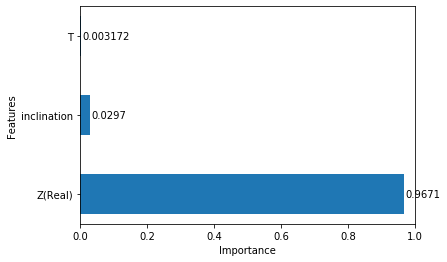

In [44]:
horizontal_bars = plt.barh(columns, gain, height= 0.5, align="center")
plt.xlim(0,1.0)
plt.ylabel('Features')
plt.xlabel('Importance')
value_format = "{:.4}"  # displaying values as percentage with one fractional digit
label_bars(horizontal_bars, value_format)

## Hyperparameter Optimised XGboost Plots

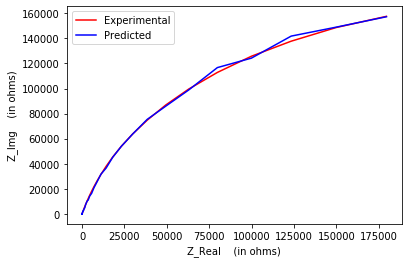

In [29]:
plt.plot(df_base["XY"].values,df_base["Img"].values,'r',label = 'Experimental')
plt.plot(df_base["XY"].values,final_model.predict(df_base.drop(['Img'],axis=1)),'b',label='Predicted')
plt.legend()
#plt.title('Base')
plt.xlabel('Z_Real    (in ohms)')
plt.ylabel('Z_Img    (in ohms)')
plt.savefig('nyquist_xgb_ab.png',dpi = 1200,bbox_inches='tight')
plt.show()

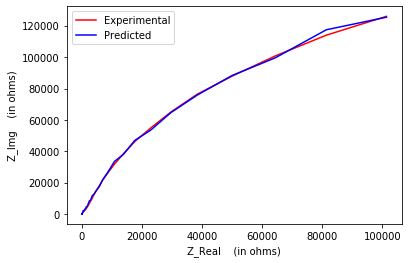

In [30]:
plt.plot(df_ht["XY"].values,df_ht["Img"].values,'r',label = 'Experimental')
plt.plot(df_ht["XY"].values,final_model.predict(df_ht.drop(['Img'],axis=1)),'b',label='Predicted')
plt.legend()
#plt.title('Base')
plt.xlabel('Z_Real    (in ohms)')
plt.ylabel('Z_Img    (in ohms)')
plt.savefig('nyquist_xgb_ht.png',dpi = 1200,bbox_inches='tight')
plt.show()

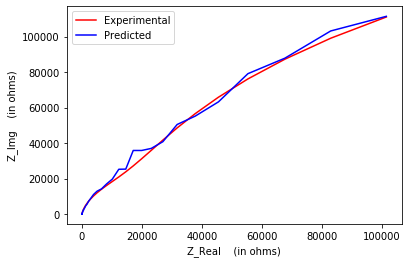

In [31]:
plt.plot(df_sp["XY"].values,df_sp["Img"].values,'r',label = 'Experimental')
plt.plot(df_sp["XY"].values,final_model.predict(df_sp.drop(['Img'],axis=1)),'b',label='Predicted')
plt.legend()
#plt.title('Base')
plt.xlabel('Z_Real    (in ohms)')
plt.ylabel('Z_Img    (in ohms)')
plt.savefig('nyquist_xgb_sp.png',dpi = 1200,bbox_inches='tight')
plt.show()

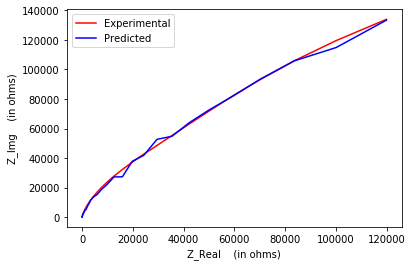

In [32]:
plt.plot(df_htsp["XY"].values,df_htsp["Img"].values,'r',label = 'Experimental')
plt.plot(df_htsp["XY"].values,final_model.predict(df_htsp.drop(['Img'],axis=1)),'b',label='Predicted')
plt.legend()
#plt.title('Base')
plt.xlabel('Z_Real    (in ohms)')
plt.ylabel('Z_Img    (in ohms)')
plt.savefig('nyquist_xgb_htsp.png',dpi = 1200,bbox_inches='tight')
plt.show()